# Make Figures for fourth section of Results

"3.4 Biogeochemical implications"

 - Figure 4

## imports

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
import dask as da
from dask.diagnostics import ProgressBar
import gsw as gsw

# plotting packages
#import seaborn as sb
#sb.set(style='ticks')
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.gridspec import GridSpec
from matplotlib import colors
import cmocean.cm as cmo
from cmocean.tools import lighten
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil

import xesmf as xe 

wrkdir = "/expanse/lustre/projects/ciw112/pbuchanan/JRA55"
os.chdir(wrkdir)

# activate the dask progress bar
#ProgressBar().register()

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


## load in the model data

In [2]:
%%time

files = ['JRA55_pic_1m_ptrc_T_1958-1967.nc',
         'JRA55_pic_1m_ptrc_T_1968-1977.nc',
         'JRA55_pic_1m_ptrc_T_1978-1987.nc',
         'JRA55_pic_1m_ptrc_T_1988-1997.nc',
         'JRA55_pic_1m_ptrc_T_1998-2007.nc',
         'JRA55_pic_1m_ptrc_T_2008-2017.nc',
         'JRA55_pic_1m_ptrc_T_2018-2022.nc']
age = xr.open_mfdataset(files, combine='nested', concat_dim='record')['Age']
dic = xr.open_mfdataset(files, combine='nested', concat_dim='record')['DIC']
no3 = xr.open_mfdataset(files, combine='nested', concat_dim='record')['NO3']

files = ['JRA55_pic_1m_diad_T_1958-1967.nc',
         'JRA55_pic_1m_diad_T_1968-1977.nc',
         'JRA55_pic_1m_diad_T_1978-1987.nc',
         'JRA55_pic_1m_diad_T_1988-1997.nc',
         'JRA55_pic_1m_diad_T_1998-2007.nc',
         'JRA55_pic_1m_diad_T_2008-2017.nc',
         'JRA55_pic_1m_diad_T_2018-2022.nc']
nppn = xr.open_mfdataset(files, combine='nested', concat_dim='record')['PPPHYN']
nppd = xr.open_mfdataset(files, combine='nested', concat_dim='record')['PPPHYD']
cflx = xr.open_mfdataset(files, combine='nested', concat_dim='record')['Cflx']

# Pacemaker experiments
age_SEInd = xr.open_dataset('JRA55_SEInd_1m_ptrc_T_Y2022.nc')['Age']
dic_SEInd = xr.open_dataset('JRA55_SEInd_1m_ptrc_T_Y2022.nc')['DIC']
no3_SEInd = xr.open_dataset('JRA55_SEInd_1m_ptrc_T_Y2022.nc')['NO3']
nppn_SEInd = xr.open_dataset('JRA55_SEInd_1m_diad_T_Y2022.nc')['PPPHYN']
nppd_SEInd = xr.open_dataset('JRA55_SEInd_1m_diad_T_Y2022.nc')['PPPHYD']
cflx_SEInd = xr.open_dataset('JRA55_SEInd_1m_diad_T_Y2022.nc')['Cflx']

age_SWInd = xr.open_dataset('JRA55_SWInd_1m_ptrc_T_Y2022.nc')['Age']
dic_SWInd = xr.open_dataset('JRA55_SWInd_1m_ptrc_T_Y2022.nc')['DIC']
no3_SWInd = xr.open_dataset('JRA55_SWInd_1m_ptrc_T_Y2022.nc')['NO3']
nppn_SWInd = xr.open_dataset('JRA55_SWInd_1m_diad_T_Y2022.nc')['PPPHYN']
nppd_SWInd = xr.open_dataset('JRA55_SWInd_1m_diad_T_Y2022.nc')['PPPHYD']
cflx_SWInd = xr.open_dataset('JRA55_SWInd_1m_diad_T_Y2022.nc')['Cflx']

age_SEPac = xr.open_dataset('JRA55_SEPac_1m_ptrc_T_Y2022.nc')['Age']
dic_SEPac = xr.open_dataset('JRA55_SEPac_1m_ptrc_T_Y2022.nc')['DIC']
no3_SEPac = xr.open_dataset('JRA55_SEPac_1m_ptrc_T_Y2022.nc')['NO3']
nppn_SEPac = xr.open_dataset('JRA55_SEPac_1m_diad_T_Y2022.nc')['PPPHYN']
nppd_SEPac = xr.open_dataset('JRA55_SEPac_1m_diad_T_Y2022.nc')['PPPHYD']
cflx_SEPac = xr.open_dataset('JRA55_SEPac_1m_diad_T_Y2022.nc')['Cflx']

age_SWPac = xr.open_dataset('JRA55_SWPac_1m_ptrc_T_Y2022.nc')['Age']
dic_SWPac = xr.open_dataset('JRA55_SWPac_1m_ptrc_T_Y2022.nc')['DIC']
no3_SWPac = xr.open_dataset('JRA55_SWPac_1m_ptrc_T_Y2022.nc')['NO3']
nppn_SWPac = xr.open_dataset('JRA55_SWPac_1m_diad_T_Y2022.nc')['PPPHYN']
nppd_SWPac = xr.open_dataset('JRA55_SWPac_1m_diad_T_Y2022.nc')['PPPHYD']
cflx_SWPac = xr.open_dataset('JRA55_SWPac_1m_diad_T_Y2022.nc')['Cflx']


CPU times: user 3.61 s, sys: 263 ms, total: 3.87 s
Wall time: 20.9 s


In [3]:
%%time

# grab the volume of grid cells on the tracer grid
data = xr.open_dataset('ORCA2.0.full_grid.nc')
lons = data['lon']
lats = data['lat']
lons_bnds = data['bounds_lon']
lats_bnds = data['bounds_lat']

data = xr.open_dataset('ORCA2_xyz_grid_T.nc')
dxt = data['e1t']
dyt = data['e2t']
dzt = data['e3t']
volume = dxt * dyt * dzt
area = dxt * dyt

data.close()


CPU times: user 23.3 ms, sys: 10.9 ms, total: 34.2 ms
Wall time: 148 ms


## rename some dimensions/coordinates

In [4]:

month = np.arange(1,13,1)
year = np.arange(1958.5,2022.51,1)

age = age.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
dic = dic.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
no3 = no3.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
nppn = nppn.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
nppd = nppd.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month', 'deptht':'depth'})
cflx = cflx.assign_coords(record=year, time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'record':'year', 'time_counter':'month'})

age_SEInd = age_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
dic_SEInd = dic_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
no3_SEInd = no3_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppn_SEInd = nppn_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppd_SEInd = nppd_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
cflx_SEInd = cflx_SEInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month'})

age_SWInd = age_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
dic_SWInd = dic_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
no3_SWInd = no3_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppn_SWInd = nppn_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppd_SWInd = nppd_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
cflx_SWInd = cflx_SWInd.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month'})

age_SEPac = age_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
dic_SEPac = dic_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
no3_SEPac = no3_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppn_SEPac = nppn_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppd_SEPac = nppd_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
cflx_SEPac = cflx_SEPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month'})

age_SWPac = age_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
dic_SWPac = dic_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
no3_SWPac = no3_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppn_SWPac = nppn_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
nppd_SWPac = nppd_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month', 'deptht':'depth'})
cflx_SWPac = cflx_SWPac.assign_coords(time_counter=month).rename({'nav_lon':'lon', 'nav_lat':'lat', 'time_counter':'month'})

volume = volume.rename({"deptht":"depth"})



## chunk the datasets

In [5]:
chunky = {'year':1, 'month':1, 'depth':31, 'y':149, 'x':182}
age = age.chunk(chunks=chunky).drop_vars('time_centered')
dic = dic.chunk(chunks=chunky).drop_vars('time_centered')
no3 = no3.chunk(chunks=chunky).drop_vars('time_centered')
nppn = nppn.chunk(chunks=chunky).drop_vars('time_centered')
nppd = nppd.chunk(chunks=chunky).drop_vars('time_centered')


## Calculate the vertically-integrated NPP

In [6]:
npp = nppn + nppd
npp = (npp * (volume/area)).sum(dim='depth')

npp_SEPac = nppn_SEPac + nppd_SEPac
npp_SEPac = (npp_SEPac * (volume/area)).sum(dim='depth')

npp_SWPac = nppn_SWPac + nppd_SWPac
npp_SWPac = (npp_SWPac * (volume/area)).sum(dim='depth')

npp_SEInd = nppn_SEInd + nppd_SEInd
npp_SEInd = (npp_SEInd * (volume/area)).sum(dim='depth')

npp_SWInd = nppn_SWInd + nppd_SWInd
npp_SWInd = (npp_SWInd * (volume/area)).sum(dim='depth')


## Calculate the change at the end of the simulation

In [7]:
%%time

dage = age.isel(year=slice(-20,-1)).mean(dim='year') - age.isel(year=slice(0,20)).mean(dim='year')
ddic = dic.isel(year=slice(-20,-1)).mean(dim='year') - dic.isel(year=slice(0,20)).mean(dim='year')
dno3 = no3.isel(year=slice(-20,-1)).mean(dim='year') - no3.isel(year=slice(0,20)).mean(dim='year')
dnpp = npp.isel(year=slice(-20,-1)).mean(dim='year') - npp.isel(year=slice(0,20)).mean(dim='year')
dcflx = cflx.isel(year=slice(-20,-1)).mean(dim='year') - cflx.isel(year=slice(0,20)).mean(dim='year')


CPU times: user 37.3 ms, sys: 1.86 ms, total: 39.2 ms
Wall time: 39 ms


## Regrid the datasets


In [8]:
%%time

ds_out = xe.util.grid_global(1,1)

ds_in = xr.Dataset(
    {'delta_age': ( ('month', 'y', 'x'), dage.isel(depth=0).values),
     'delta_dic': ( ('month', 'y', 'x'), ddic.isel(depth=0).values),
     'delta_no3': ( ('month', 'y', 'x'), dno3.isel(depth=0).values),
     'delta_npp': ( ('month', 'y', 'x'), dnpp.values),
     'delta_cflx': ( ('month', 'y', 'x'), dcflx.values),
     'SEPac_age': ( ('month', 'y', 'x'), age_SEPac.isel(depth=0).values),
     'SEPac_dic': ( ('month', 'y', 'x'), dic_SEPac.isel(depth=0).values),
     'SEPac_no3': ( ('month', 'y', 'x'), no3_SEPac.isel(depth=0).values),
     'SEPac_npp': ( ('month', 'y', 'x'), npp_SEPac.values),
     'SEPac_cflx': ( ('month', 'y', 'x'), cflx_SEPac.values),
     'SWPac_age': ( ('month', 'y', 'x'), age_SWPac.isel(depth=0).values),
     'SWPac_dic': ( ('month', 'y', 'x'), dic_SWPac.isel(depth=0).values),
     'SWPac_no3': ( ('month', 'y', 'x'), no3_SWPac.isel(depth=0).values),
     'SWPac_npp': ( ('month', 'y', 'x'), npp_SWPac.values),
     'SWPac_cflx': ( ('month', 'y', 'x'), cflx_SWPac.values),
     'SEInd_age': ( ('month', 'y', 'x'), age_SEInd.isel(depth=0).values),
     'SEInd_dic': ( ('month', 'y', 'x'), dic_SEInd.isel(depth=0).values),
     'SEInd_no3': ( ('month', 'y', 'x'), no3_SEInd.isel(depth=0).values),
     'SEInd_npp': ( ('month', 'y', 'x'), npp_SEInd.values),
     'SEInd_cflx': ( ('month', 'y', 'x'), cflx_SEInd.values),
     'SWInd_age': ( ('month', 'y', 'x'), age_SWInd.isel(depth=0).values),
     'SWInd_dic': ( ('month', 'y', 'x'), dic_SWInd.isel(depth=0).values),
     'SWInd_no3': ( ('month', 'y', 'x'), no3_SWInd.isel(depth=0).values),
     'SWInd_npp': ( ('month', 'y', 'x'), npp_SWInd.values),
     'SWInd_cflx': ( ('month', 'y', 'x'), cflx_SWInd.values),
     },
    coords={"lon": (['y','x'], lons.values),
            "lat": (['y','x'], lats.values),
            "month": (['month'], month),
            }
    )
regridder = xe.Regridder(ds_in, ds_out, 'bilinear', ignore_degenerate=True)



CPU times: user 22.8 s, sys: 20.2 s, total: 43 s
Wall time: 1min 30s


In [9]:
%%time

print("Regridding")

delta_age_reg = regridder(ds_in['delta_age'])
delta_dic_reg = regridder(ds_in['delta_dic'])
delta_no3_reg = regridder(ds_in['delta_no3'])
delta_npp_reg = regridder(ds_in['delta_npp'])
delta_cflx_reg = regridder(ds_in['delta_cflx'])

SEInd_age_reg = regridder(ds_in['SEInd_age'])
SEInd_dic_reg = regridder(ds_in['SEInd_dic'])
SEInd_no3_reg = regridder(ds_in['SEInd_no3'])
SEInd_npp_reg = regridder(ds_in['SEInd_npp'])
SEInd_cflx_reg = regridder(ds_in['SEInd_cflx'])

SWInd_age_reg = regridder(ds_in['SWInd_age'])
SWInd_dic_reg = regridder(ds_in['SWInd_dic'])
SWInd_no3_reg = regridder(ds_in['SWInd_no3'])
SWInd_npp_reg = regridder(ds_in['SWInd_npp'])
SWInd_cflx_reg = regridder(ds_in['SWInd_cflx'])

SEPac_age_reg = regridder(ds_in['SEPac_age'])
SEPac_dic_reg = regridder(ds_in['SEPac_dic'])
SEPac_no3_reg = regridder(ds_in['SEPac_no3'])
SEPac_npp_reg = regridder(ds_in['SEPac_npp'])
SEPac_cflx_reg = regridder(ds_in['SEPac_cflx'])

SWPac_age_reg = regridder(ds_in['SWPac_age'])
SWPac_dic_reg = regridder(ds_in['SWPac_dic'])
SWPac_no3_reg = regridder(ds_in['SWPac_no3'])
SWPac_npp_reg = regridder(ds_in['SWPac_npp'])
SWPac_cflx_reg = regridder(ds_in['SWPac_cflx'])


Regridding
CPU times: user 1.15 s, sys: 39.3 ms, total: 1.19 s
Wall time: 1.19 s


## wrap longitudes

In [10]:
delta_age_reg

<xarray.DataArray (month: 12, y: 180, x: 360)> Size: 3MB
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.00601365, 0.00592547, 0.00581102, ..., 0.0061473 ,
         0.00610334, 0.00605877],
        [0.00509186, 0.00510809, 0.00512172, ..., 0.00502735,
         0.0050515 , 0.005073  ],
        [0.00140966, 0.0014227 , 0.00143608, ..., 0.00137281,
         0.00138469, 0.00139698]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.00523159, 0.00517319, 0.00510317, ..., 0.00534986,
         0.00530987, 0.00527036],
        [0.00326946, 0.00321151, 0.00315296, ..., 0.00343939,
         0.00338343, 0.00332677],
        [0.0025072 , 0.0024939 , 0.00248082, ..., 0.00254842,
         0.00253446, 0.00252072]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.0058431 , 0.00579223, 0.00573652, ..., 0.0059684 ,
         0.00592756, 0.00588572],
        [0.00347497, 0.00341053, 0.00334537, ..., 0.00366388,
         0.00360165, 0.00353868],
        [0.00322512, 0.00320347, 0.00318219, ..., 0.00329235,
         0.00326956, 0.00324715]]], dtype=float32)
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
    lon      (y, x) float64 518kB -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lat      (y, x) float64 518kB -89.5 -89.5 -89.5 -89.5 ... 89.5 89.5 89.5
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [11]:
delta_age_reg = xr.DataArray(
    delta_age_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

delta_dic_reg = xr.DataArray(
    delta_dic_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

delta_no3_reg = xr.DataArray(
    delta_no3_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

delta_npp_reg = xr.DataArray(
    delta_npp_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

delta_cflx_reg = xr.DataArray(
    delta_cflx_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEInd_age_reg = xr.DataArray(
    SEInd_age_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEInd_dic_reg = xr.DataArray(
    SEInd_dic_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEInd_no3_reg = xr.DataArray(
    SEInd_no3_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEInd_npp_reg = xr.DataArray(
    SEInd_npp_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEInd_cflx_reg = xr.DataArray(
    SEInd_cflx_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWInd_age_reg = xr.DataArray(
    SWInd_age_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWInd_dic_reg = xr.DataArray(
    SWInd_dic_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWInd_no3_reg = xr.DataArray(
    SWInd_no3_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWInd_npp_reg = xr.DataArray(
    SWInd_npp_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWInd_cflx_reg = xr.DataArray(
    SWInd_cflx_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEPac_age_reg = xr.DataArray(
    SEPac_age_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEPac_dic_reg = xr.DataArray(
    SEPac_dic_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEPac_no3_reg = xr.DataArray(
    SEPac_no3_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEPac_npp_reg = xr.DataArray(
    SEPac_npp_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SEPac_cflx_reg = xr.DataArray(
    SEPac_cflx_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWPac_age_reg = xr.DataArray(
    SWPac_age_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWPac_dic_reg = xr.DataArray(
    SWPac_dic_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWPac_no3_reg = xr.DataArray(
    SWPac_no3_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWPac_npp_reg = xr.DataArray(
    SWPac_npp_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )

SWPac_cflx_reg = xr.DataArray(
    SWPac_cflx_reg,
    dims=("month", "y", "x"),
    coords={"lon": (['x'], ds_out.coords['lon'].isel(y=0).values),
            "lat": (['y'], ds_out.coords['lat'].isel(x=0).values),
            "month": (['month'], month),
            }
    )


delta_age_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(delta_age_reg, coord=delta_age_reg.coords['lon'])
delta_dic_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(delta_dic_reg, coord=delta_age_reg.coords['lon'])
delta_no3_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(delta_no3_reg, coord=delta_age_reg.coords['lon'])
delta_npp_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(delta_npp_reg, coord=delta_age_reg.coords['lon'])
delta_cflx_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(delta_cflx_reg, coord=delta_age_reg.coords['lon'])

SEInd_age_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEInd_age_reg, coord=delta_age_reg.coords['lon'])
SEInd_dic_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEInd_dic_reg, coord=delta_age_reg.coords['lon'])
SEInd_no3_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEInd_no3_reg, coord=delta_age_reg.coords['lon'])
SEInd_npp_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEInd_npp_reg, coord=delta_age_reg.coords['lon'])
SEInd_cflx_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEInd_cflx_reg, coord=delta_age_reg.coords['lon'])

SWInd_age_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWInd_age_reg, coord=delta_age_reg.coords['lon'])
SWInd_dic_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWInd_dic_reg, coord=delta_age_reg.coords['lon'])
SWInd_no3_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWInd_no3_reg, coord=delta_age_reg.coords['lon'])
SWInd_npp_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWInd_npp_reg, coord=delta_age_reg.coords['lon'])
SWInd_cflx_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWInd_cflx_reg, coord=delta_age_reg.coords['lon'])

SEPac_age_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEPac_age_reg, coord=delta_age_reg.coords['lon'])
SEPac_dic_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEPac_dic_reg, coord=delta_age_reg.coords['lon'])
SEPac_no3_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEPac_no3_reg, coord=delta_age_reg.coords['lon'])
SEPac_npp_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEPac_npp_reg, coord=delta_age_reg.coords['lon'])
SEPac_cflx_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SEPac_cflx_reg, coord=delta_age_reg.coords['lon'])

SWPac_age_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWPac_age_reg, coord=delta_age_reg.coords['lon'])
SWPac_dic_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWPac_dic_reg, coord=delta_age_reg.coords['lon'])
SWPac_no3_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWPac_no3_reg, coord=delta_age_reg.coords['lon'])
SWPac_npp_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWPac_npp_reg, coord=delta_age_reg.coords['lon'])
SWPac_cflx_wrapped, lon_reg_wrapped = cutil.add_cyclic_point(SWPac_cflx_reg, coord=delta_age_reg.coords['lon'])

np.shape(delta_age_wrapped)

(12, 180, 361)

## Figure 4

Text(40, -90, 'More ingassing or less outgassing')

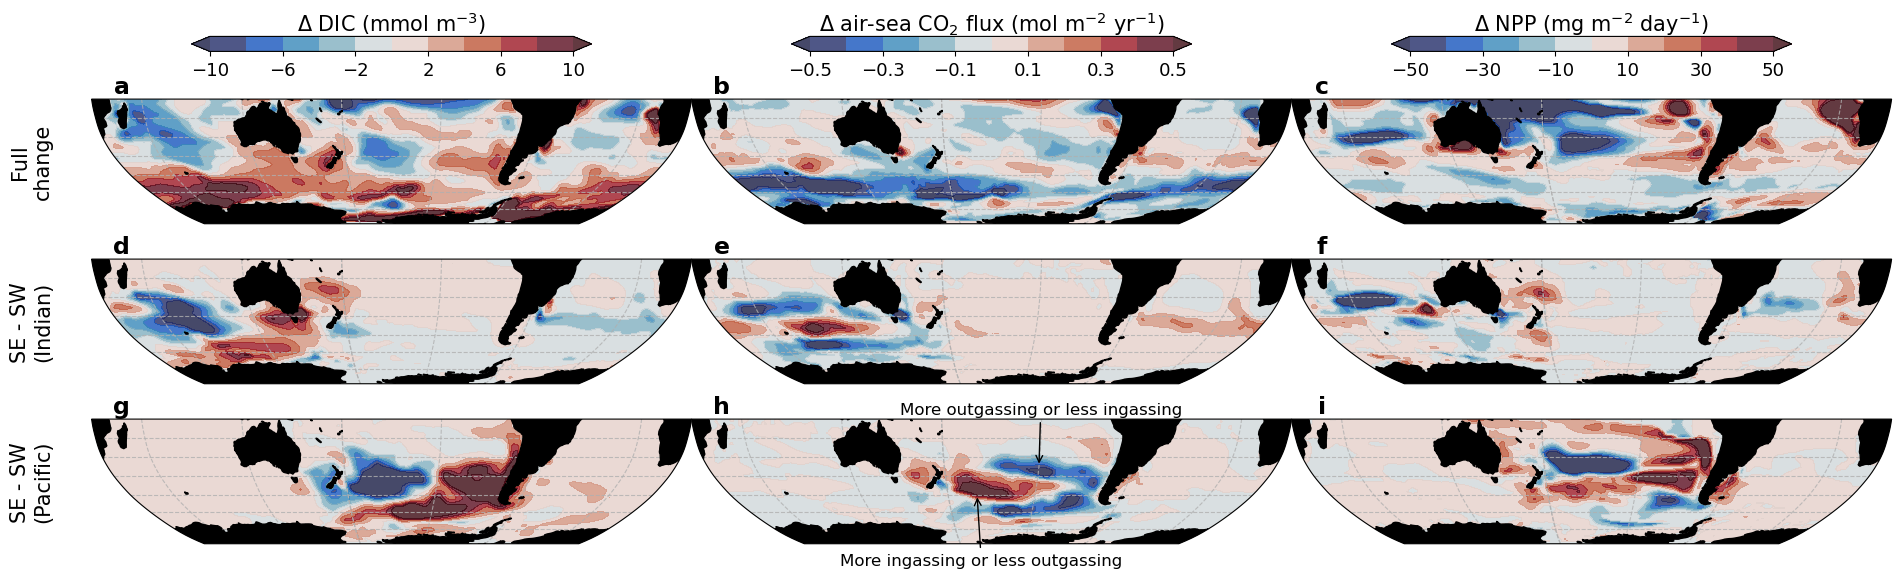

In [12]:

proj = ccrs.Robinson(central_longitude=210)

levs1 = np.arange(-10,11,2)
levs2 = np.arange(-0.5,0.51,0.1)
levs3 = np.arange(-50,51,10)

colmap = lighten(cmo.balance, 0.8)
fstic = 13
fslab = 15

fig = plt.figure(figsize=(20,6), facecolor='w')
gs = GridSpec(3,3)

ax1 = plt.subplot(gs[0,0], projection=proj)
ax2 = plt.subplot(gs[0,1], projection=proj)
ax3 = plt.subplot(gs[0,2], projection=proj)
ax4 = plt.subplot(gs[1,0], projection=proj)
ax5 = plt.subplot(gs[1,1], projection=proj)
ax6 = plt.subplot(gs[1,2], projection=proj)
ax7 = plt.subplot(gs[2,0], projection=proj)
ax8 = plt.subplot(gs[2,1], projection=proj)
ax9 = plt.subplot(gs[2,2], projection=proj)

ax1.add_feature(cfeature.LAND, zorder=3, color='k')
ax2.add_feature(cfeature.LAND, zorder=3, color='k')
ax3.add_feature(cfeature.LAND, zorder=3, color='k')
ax4.add_feature(cfeature.LAND, zorder=3, color='k')
ax5.add_feature(cfeature.LAND, zorder=3, color='k')
ax6.add_feature(cfeature.LAND, zorder=3, color='k')
ax7.add_feature(cfeature.LAND, zorder=3, color='k')
ax8.add_feature(cfeature.LAND, zorder=3, color='k')
ax9.add_feature(cfeature.LAND, zorder=3, color='k')
ax1.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax2.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax3.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax4.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax5.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax6.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax7.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax8.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())
ax9.set_extent([-180,180,-80,-10], crs=ccrs.PlateCarree())

p1 = ax1.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(delta_dic_wrapped, axis=0), transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p2 = ax2.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(delta_cflx_wrapped, axis=0)*86400*365, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
p3 = ax3.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(delta_npp_wrapped, axis=0)*86400*1e3*12, transform=ccrs.PlateCarree(), levels=levs3, cmap=colmap, vmin=np.min(levs3), vmax=np.max(levs3), extend='both')

p4 = ax4.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEInd_dic_wrapped - SWInd_dic_wrapped, axis=0), transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p5 = ax5.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEInd_cflx_wrapped - SWInd_cflx_wrapped, axis=0)*86400*365, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
p6 = ax6.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEInd_npp_wrapped - SWInd_npp_wrapped, axis=0)*86400*1e3*12, transform=ccrs.PlateCarree(), levels=levs3, cmap=colmap, vmin=np.min(levs3), vmax=np.max(levs3), extend='both')

p7 = ax7.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEPac_dic_wrapped - SWPac_dic_wrapped, axis=0), transform=ccrs.PlateCarree(), levels=levs1, cmap=colmap, vmin=np.min(levs1), vmax=np.max(levs1), extend='both')
p8 = ax8.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEPac_cflx_wrapped - SWPac_cflx_wrapped, axis=0)*86400*365, transform=ccrs.PlateCarree(), levels=levs2, cmap=colmap, vmin=np.min(levs2), vmax=np.max(levs2), extend='both')
p9 = ax9.contourf(lon_reg_wrapped,ds_out['lat'].isel(x=0), np.mean(SEPac_npp_wrapped - SWPac_npp_wrapped, axis=0)*86400*1e3*12, transform=ccrs.PlateCarree(), levels=levs3, cmap=colmap, vmin=np.min(levs3), vmax=np.max(levs3), extend='both')


plt.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05, hspace=0.0, wspace=0.0)


xx = 0.05; yy = 1.1
plt.text(xx,yy,'a', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax1.transAxes)
plt.text(xx,yy,'b', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax2.transAxes)
plt.text(xx,yy,'c', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax3.transAxes)
plt.text(xx,yy,'d', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax4.transAxes)
plt.text(xx,yy,'e', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax5.transAxes)
plt.text(xx,yy,'f', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax6.transAxes)
plt.text(xx,yy,'g', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax7.transAxes)
plt.text(xx,yy,'h', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax8.transAxes)
plt.text(xx,yy,'i', fontsize=fslab+2, va='center', ha='center', fontweight='bold', transform=ax9.transAxes)

xx = -0.1; yy = 0.5
plt.text(xx,yy,'Full\nchange', fontsize=fslab, va='center', ha='center', transform=ax1.transAxes, rotation=90)
plt.text(xx,yy,'SE - SW\n(Indian)', fontsize=fslab, va='center', ha='center', transform=ax4.transAxes, rotation=90)
plt.text(xx,yy,'SE - SW\n(Pacific)', fontsize=fslab, va='center', ha='center', transform=ax7.transAxes, rotation=90)

cbax1 = fig.add_axes([0.1,0.9,0.2,0.025])
cbax2 = fig.add_axes([0.4,0.9,0.2,0.025])
cbax3 = fig.add_axes([0.7,0.9,0.2,0.025])

cbar1 = plt.colorbar(p1, cax=cbax1, orientation='horizontal', ticks=levs1[::2]) 
cbar2 = plt.colorbar(p2, cax=cbax2, orientation='horizontal', ticks=levs2[::2]) 
cbar3 = plt.colorbar(p3, cax=cbax3, orientation='horizontal', ticks=levs3[::2])

cbar1.ax.tick_params(labelsize=fstic)
cbar2.ax.tick_params(labelsize=fstic)
cbar3.ax.tick_params(labelsize=fstic)

cbar1.ax.set_xlabel('$\Delta$ DIC (mmol m$^{-3}$)', fontsize=fslab)
cbar2.ax.set_xlabel('$\Delta$ air-sea CO$_2$ flux (mol m$^{-2}$ yr$^{-1}$)', fontsize=fslab)
cbar3.ax.set_xlabel('$\Delta$ NPP (mg m$^{-2}$ day$^{-1}$)', fontsize=fslab)

cbar1.ax.xaxis.set_label_position('top')
cbar2.ax.xaxis.set_label_position('top')
cbar3.ax.xaxis.set_label_position('top')

ax1.gridlines(linestyle='--', alpha=0.8)
ax2.gridlines(linestyle='--', alpha=0.8)
ax3.gridlines(linestyle='--', alpha=0.8)
ax4.gridlines(linestyle='--', alpha=0.8)
ax5.gridlines(linestyle='--', alpha=0.8)
ax6.gridlines(linestyle='--', alpha=0.8)
ax7.gridlines(linestyle='--', alpha=0.8)
ax8.gridlines(linestyle='--', alpha=0.8)
ax9.gridlines(linestyle='--', alpha=0.8)

# Annotate the map
transform=ccrs.PlateCarree()._as_mpl_transform(ax8)
ax8.annotate(
    'More outgassing or less ingassing',               # The text to display
    xy=(240, -35),        # The location to point to
    xytext=(155, -5),                # The location of the text
    xycoords=transform,
    arrowprops=dict(facecolor='k', arrowstyle='->'),  # Arrow style
    fontsize=12,                     # Font size
    color='k',                     # Text color
    horizontalalignment='left',      # Text alignment
    verticalalignment='center'
)
ax8.annotate(
    'More ingassing or less outgassing',               # The text to display
    xy=(200, -50),        # The location to point to
    xytext=(40, -90),                # The location of the text
    xycoords=transform,
    arrowprops=dict(facecolor='k', arrowstyle='->'),  # Arrow style
    fontsize=12,                     # Font size
    color='k',                     # Text color
    horizontalalignment='left',      # Text alignment
    verticalalignment='top'
)


In [13]:
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_bgc.png', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_bgc.pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-pacemakerexps_bgc_trans.png', dpi=300, bbox_inches='tight', transparent=True)


## do the correlations in SAMW changes between start-end hindcast and pacemaker runs

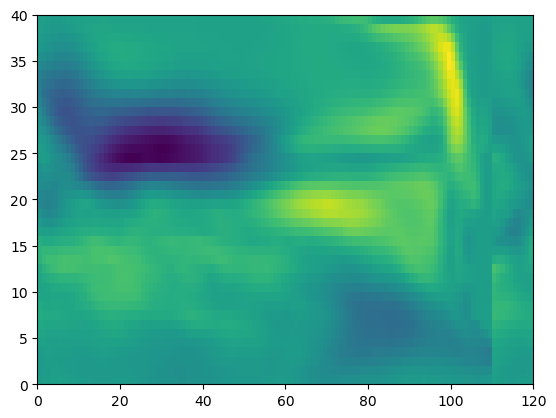

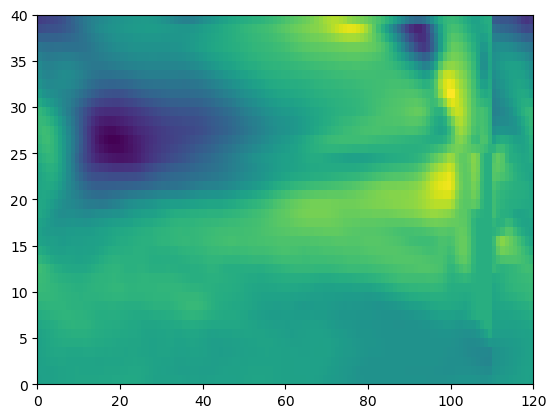

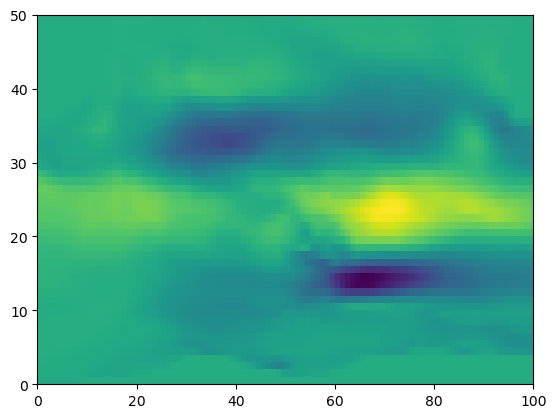

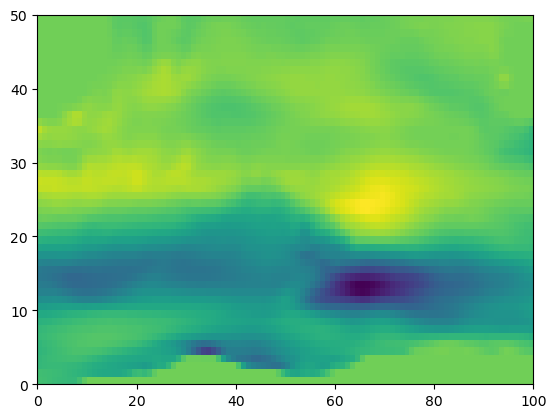

In [14]:
# get changes
dic_hind = (delta_dic_reg)
dicPac_pace = (SEPac_dic_reg - SWPac_dic_reg)
dicInd_pace = (SEInd_dic_reg - SWInd_dic_reg)
flx_hind = (delta_cflx_reg)
flxPac_pace = (SEPac_cflx_reg - SWPac_cflx_reg)
flxInd_pace = (SEInd_cflx_reg - SWInd_cflx_reg)
npp_hind = (delta_npp_reg)
nppPac_pace = (SEPac_npp_reg - SWPac_npp_reg)
nppInd_pace = (SEInd_npp_reg - SWInd_npp_reg)

lons = dic_hind.coords['lon'] 
lats = dic_hind.coords['lat'] 

# cut the areas
dicPac_hind = (dic_hind.where(lons < -70, other=0.0) + dic_hind.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
dicInd_hind = dic_hind.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)
dicPac_pace = (dicPac_pace.where(lons < -70.0, other=0.0) + dicPac_pace.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
dicInd_pace = dicInd_pace.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)

flxPac_hind = (flx_hind.where(lons < -70, other=0.0) + flx_hind.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
flxInd_hind = flx_hind.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)
flxPac_pace = (flxPac_pace.where(lons < -70.0, other=0.0) + flxPac_pace.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
flxInd_pace = flxInd_pace.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)

nppPac_hind = (npp_hind.where(lons < -70, other=0.0) + npp_hind.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
nppInd_hind = npp_hind.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)
nppPac_pace = (nppPac_pace.where(lons < -70.0, other=0.0) + nppPac_pace.where(lons > 170.0, other=0.0)).where((lats < -20.0) & (lats > -60.0), other=0.0)
nppInd_pace = nppInd_pace.where((lons < 120.0) & (lons > 20.0) & (lats < -20.0) & (lats > -70.0), other=0.0)


# drop the regions outside our area of interest
dicPac_hind = dicPac_hind.where(dicPac_hind != 0.0, drop=True).fillna(0.0)
dicInd_hind = dicInd_hind.where(dicInd_hind != 0.0, drop=True).fillna(0.0)
dicPac_pace = dicPac_pace.where(dicPac_pace != 0.0, drop=True).fillna(0.0)
dicInd_pace = dicInd_pace.where(dicInd_pace != 0.0, drop=True).fillna(0.0)

flxPac_hind = flxPac_hind.where(flxPac_hind != 0.0, drop=True).fillna(0.0)
flxInd_hind = flxInd_hind.where(flxInd_hind != 0.0, drop=True).fillna(0.0)
flxPac_pace = flxPac_pace.where(flxPac_pace != 0.0, drop=True).fillna(0.0)
flxInd_pace = flxInd_pace.where(flxInd_pace != 0.0, drop=True).fillna(0.0)

nppPac_hind = nppPac_hind.where(nppPac_hind != 0.0, drop=True).fillna(0.0)
nppInd_hind = nppInd_hind.where(nppInd_hind != 0.0, drop=True).fillna(0.0)
nppPac_pace = nppPac_pace.where(nppPac_pace != 0.0, drop=True).fillna(0.0)
nppInd_pace = nppInd_pace.where(nppInd_pace != 0.0, drop=True).fillna(0.0)


# add back the zeros 
#dicPac_hind = dicPac_hind.fillna(0.0)
#dicInd_hind = dicInd_hind.fillna(0.0)
#dicPac_pace = dicPac_pace.fillna(0.0)
#dicInd_pace = dicInd_pace.fillna(0.0)

plt.figure()
plt.pcolormesh(nppPac_pace.mean(dim='month'))
plt.figure()
plt.pcolormesh(nppPac_hind.mean(dim='month'))

plt.figure()
plt.pcolormesh(flxInd_pace.mean(dim='month'))
plt.figure()
plt.pcolormesh(flxInd_hind.mean(dim='month'))


In [16]:
%%time

### perform the correlation computation
from scipy.stats import pearsonr

ntimes = 1000
### to avoid spatial autocorrelation, randomly select from the arrays
corr_dicPac = np.zeros(ntimes)
corr_dicInd = np.zeros(ntimes)
p_val_dicPac = np.zeros(ntimes)
p_val_dicInd = np.zeros(ntimes)
corr_flxPac = np.zeros(ntimes)
corr_flxInd = np.zeros(ntimes)
p_val_flxPac = np.zeros(ntimes)
p_val_flxInd = np.zeros(ntimes)
corr_nppPac = np.zeros(ntimes)
corr_nppInd = np.zeros(ntimes)
p_val_nppPac = np.zeros(ntimes)
p_val_nppInd = np.zeros(ntimes)

# Randomly select 1000 indices from the range of 5000
for ii in np.arange(ntimes):
    np.random.seed(ii)  # Optional: Set a seed for reproducibility
    i_dicPac = np.random.choice(len(dicPac_hind.values.flatten()), size=1000, replace=False)
    i_dicInd = np.random.choice(len(dicInd_hind.values.flatten()), size=1000, replace=False)
    i_flxPac = np.random.choice(len(flxPac_hind.values.flatten()), size=1000, replace=False)
    i_flxInd = np.random.choice(len(flxInd_hind.values.flatten()), size=1000, replace=False)
    i_nppPac = np.random.choice(len(nppPac_hind.values.flatten()), size=1000, replace=False)
    i_nppInd = np.random.choice(len(nppInd_hind.values.flatten()), size=1000, replace=False)

    dic_hindPac = dicPac_hind.values.flatten()[i_dicPac]
    dic_hindInd = dicInd_hind.values.flatten()[i_dicInd]
    dic_pacePac = dicPac_pace.values.flatten()[i_dicPac]
    dic_paceInd = dicInd_pace.values.flatten()[i_dicInd]

    flx_hindPac = flxPac_hind.values.flatten()[i_flxPac]
    flx_hindInd = flxInd_hind.values.flatten()[i_flxInd]
    flx_pacePac = flxPac_pace.values.flatten()[i_flxPac]
    flx_paceInd = flxInd_pace.values.flatten()[i_flxInd]

    npp_hindPac = nppPac_hind.values.flatten()[i_nppPac]
    npp_hindInd = nppInd_hind.values.flatten()[i_nppInd]
    npp_pacePac = nppPac_pace.values.flatten()[i_nppPac]
    npp_paceInd = nppInd_pace.values.flatten()[i_nppInd]
    
    corr_dicPac[ii], p_val_dicPac[ii] = pearsonr(dic_hindPac, dic_pacePac)
    corr_dicInd[ii], p_val_dicInd[ii] = pearsonr(dic_hindInd, dic_paceInd)

    corr_flxPac[ii], p_val_flxPac[ii] = pearsonr(flx_hindPac, flx_pacePac)
    corr_flxInd[ii], p_val_flxInd[ii] = pearsonr(flx_hindInd, flx_paceInd)

    corr_nppPac[ii], p_val_nppPac[ii] = pearsonr(npp_hindPac, npp_pacePac)
    corr_nppInd[ii], p_val_nppInd[ii] = pearsonr(npp_hindInd, npp_paceInd)


print("Mean correlation for $\Delta$DIC in Pacific and Indian", np.mean(corr_dicPac), np.mean(corr_dicInd))
print("Mean correlation for $\Delta$CO$_2$ flux in Pacific and Indian", np.mean(corr_flxPac), np.mean(corr_flxInd))
print("Mean correlation for $\Delta$NPP in Pacific and Indian", np.mean(corr_nppPac), np.mean(corr_nppInd))


Mean correlation for $\Delta$DIC in Pacific and Indian 0.6064626577496529 0.5069975254237652
Mean correlation for $\Delta$CO$_2$ flux in Pacific and Indian 0.2708287508487701 0.28120553348958494
Mean correlation for $\Delta$NPP in Pacific and Indian 0.5508712264299392 0.35994735454022886
CPU times: user 6.25 s, sys: 8.64 ms, total: 6.25 s
Wall time: 6.27 s


{'whiskers': [<matplotlib.lines.Line2D at 0x15547e6817e0>,
 'caps': [<matplotlib.lines.Line2D at 0x15547e681d20>,
 'boxes': [<matplotlib.patches.PathPatch at 0x15547e681450>,
 'medians': [<matplotlib.lines.Line2D at 0x15547e682260>,
 'fliers': [<matplotlib.lines.Line2D at 0x15547e682500>,
 'means': []}

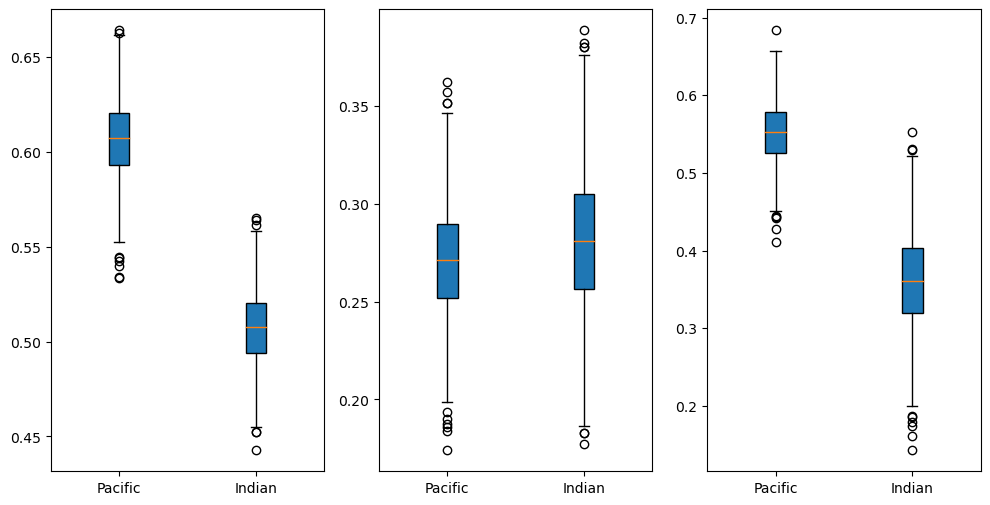

In [17]:

# Create a box and whisker plot
plt.figure(figsize=(12, 6))
gs = GridSpec(1,3)

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

ax1.boxplot([corr_dicPac, corr_dicInd], patch_artist=True, labels=["Pacific", "Indian"])
ax2.boxplot([corr_flxPac, corr_flxInd], patch_artist=True, labels=["Pacific", "Indian"])
ax3.boxplot([corr_nppPac, corr_nppInd], patch_artist=True, labels=["Pacific", "Indian"])

# Customize the plot
#ax1.title("$\Delta$DIC")
#ax1.ylabel("Correlations")
#ax1.xlabel("Basin")
#ax1.grid(axis="y")


## Now, let's look at the correlation between the I+ indices and the integrated rate of CO2 flux for the same regions

### combine the year and month dimensions

In [21]:
from datetime import datetime, timedelta

start_date = datetime(1958, 1, 1)
end_date = datetime(2022, 12, 31)
time = pd.date_range(start=start_date, end=end_date, freq="MS") + pd.DateOffset(days=14)
time

# blend years and months into one time dimension
cflx = cflx.stack(time=("year", "month"))
cflx = cflx.drop_vars(['year', 'month', 'time_centered'])
cflx = cflx.assign_coords(time=time)


### make longitudes all positive

In [ ]:
lons = cflx.coords['lon'].values
lons[lons < 0.0] += 360.0
cflx = cflx.assign_coords({"lon": (cflx.coords['lon'].dims, lons)})


### calculate the integrals of CO2 flux for the Pacific and Indian Oceans

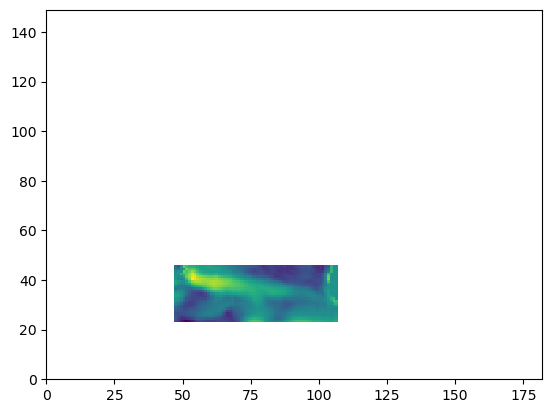

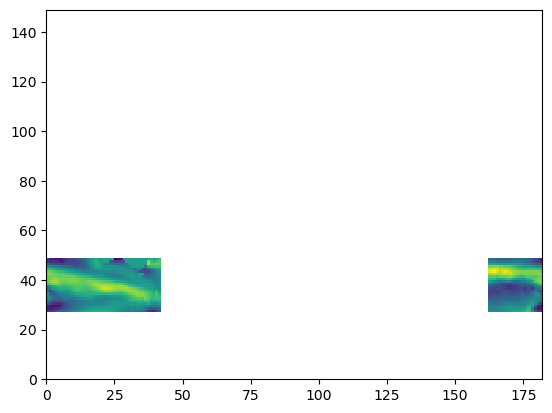

In [64]:
## lon and lat bounds for the regions
plon1 = 170.5; plon2 = 290.5
plat1 = -64.5; plat2 = -35.5
ilon1 = 40.5; ilon2 = 160.5
ilat1 = -60.5; ilat2 = -30.5

# cut out the Pacific
cflx_pac = cflx.where((cflx.coords['lon'] > plon1) & (cflx.coords['lon'] < plon2) & (cflx.coords['lat'] > plat1) & (cflx.coords['lat'] < plat2), other=np.nan)
cflx_ind = cflx.where((cflx.coords['lon'] > ilon1) & (cflx.coords['lon'] < ilon2) & (cflx.coords['lat'] > ilat1) & (cflx.coords['lat'] < ilat2), other=np.nan)

plt.figure()
plt.pcolormesh(cflx_pac.isel(time=1))
plt.figure()
plt.pcolormesh(cflx_ind.isel(time=1))

### do the area sum

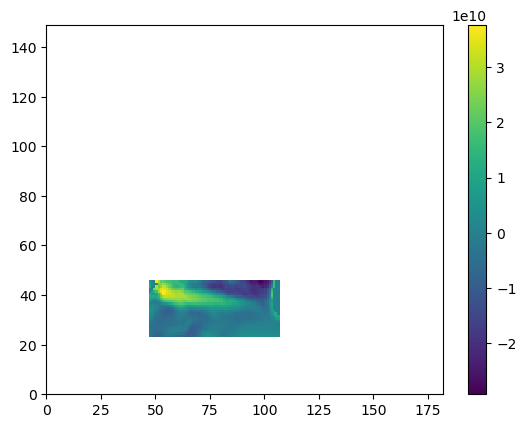

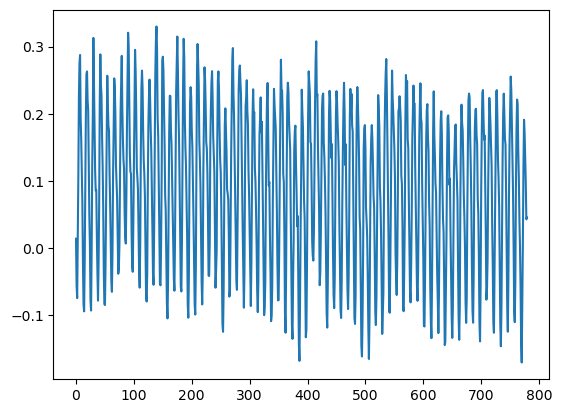

In [65]:
# multiply by the area and the number of seconds per year
cflx_pac_area = cflx_pac * area * 86400 * 365
cflx_ind_area = cflx_ind * area * 86400 * 365

plt.figure()
plt.pcolormesh(cflx_pac_area.isel(time=0))
plt.colorbar()

# sum 
cflx_pac_sum = cflx_pac_area.sum(dim=['x','y']) * 12 * 1e-15  # Pg C per year
cflx_ind_sum = cflx_ind_area.sum(dim=['x','y']) * 12 * 1e-15  # Pg C per year

plt.figure()
plt.plot(cflx_pac_sum)


### read in the indices

In [66]:
Iplus_pac = xr.open_dataarray("/home/pbuchanan/analysis_samw/MLDa_index_Iplus_Pacific.nc")
Iplus_ind = xr.open_dataarray("/home/pbuchanan/analysis_samw/MLDa_index_Iplus_Indian.nc")


### plot together

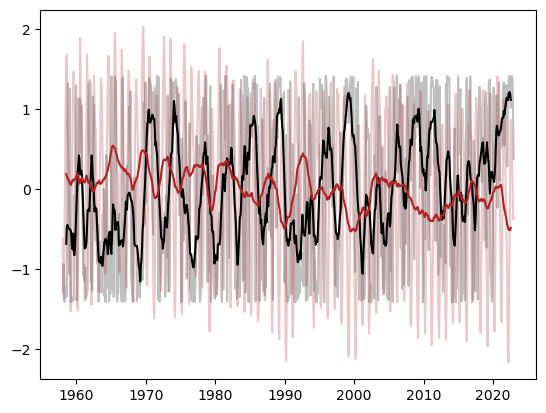

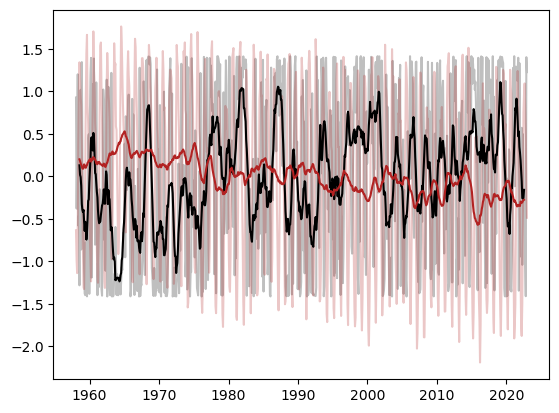

In [67]:
# normalise the flx timeseries
cflx_pac_norm = (cflx_pac_sum - cflx_pac_sum.mean()) / cflx_pac_sum.std()
cflx_ind_norm = (cflx_ind_sum - cflx_ind_sum.mean()) / cflx_ind_sum.std()

plt.figure()
plt.plot(time, Iplus_pac, color='k', alpha=0.25)
plt.plot(time, cflx_pac_norm, color='firebrick', alpha=0.25)
plt.plot(time, Iplus_pac.rolling(time=12, center=True).mean(), color='k', alpha=1, linewidth=1.5)
plt.plot(time, cflx_pac_norm.rolling(time=12, center=True).mean(), color='firebrick', alpha=1, linewidth=1.5)

plt.figure()
plt.plot(time, Iplus_ind, color='k', alpha=0.25)
plt.plot(time, cflx_ind_norm, color='firebrick', alpha=0.25)
plt.plot(time, Iplus_ind.rolling(time=12, center=True).mean(), color='k', alpha=1, linewidth=1.5)
plt.plot(time, cflx_ind_norm.rolling(time=12, center=True).mean(), color='firebrick', alpha=1, linewidth=1.5)



### Take the correlation

In [119]:
Iplus_pac_12month = Iplus_pac.rolling(time=12, center=True).mean()
cflx_pac_12month = cflx_pac_norm.rolling(time=12, center=True).mean()
Iplus_ind_12month = Iplus_ind.rolling(time=12, center=True).mean()
cflx_ind_12month = cflx_ind_norm.rolling(time=12, center=True).mean()

print(pearsonr(Iplus_pac_12month.dropna(dim='time'), cflx_pac_12month.dropna(dim='time')))
print(pearsonr(Iplus_ind_12month.dropna(dim='time'), cflx_ind_12month.dropna(dim='time')))

lags = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
print("Pacific")
pcors = []
for lag in lags:
    cflx_pac_lag = cflx_pac_12month.dropna(dim='time').values[lag:769]
    Iplus_pac_normal = Iplus_pac_12month.dropna(dim='time').values[0:769-lag]
    print(lag, pearsonr(Iplus_pac_normal, cflx_pac_lag))
    pcors.append(pearsonr(Iplus_pac_normal, cflx_pac_lag)[0])

print(" ")
print("Indian")
icors = []
for lag in lags:
    cflx_ind_lag = cflx_ind_12month.dropna(dim='time').values[lag:769]
    Iplus_ind_normal = Iplus_ind_12month.dropna(dim='time').values[0:769-lag]
    print(lag, pearsonr(Iplus_ind_normal, cflx_ind_lag))
    icors.append(pearsonr(Iplus_ind_normal, cflx_ind_lag)[0])


PearsonRResult(statistic=-0.447697776954187, pvalue=3.5560542705286485e-39)
PearsonRResult(statistic=-0.5284195700664072, pvalue=1.5872621862079653e-56)
Pacific
0 PearsonRResult(statistic=-0.447697776954187, pvalue=3.5560542705286485e-39)
1 PearsonRResult(statistic=-0.4896382133802083, pvalue=1.4973136813833822e-47)
2 PearsonRResult(statistic=-0.526005459035243, pvalue=8.531298837509851e-56)
3 PearsonRResult(statistic=-0.5574204221163186, pvalue=9.562326255127927e-64)
4 PearsonRResult(statistic=-0.5838589765194158, pvalue=4.219373360211498e-71)
5 PearsonRResult(statistic=-0.6052675039323202, pvalue=1.5235524754158548e-77)
6 PearsonRResult(statistic=-0.6222679460906217, pvalue=5.4491286524667514e-83)
7 PearsonRResult(statistic=-0.634508187055767, pvalue=4.352290050214431e-87)
8 PearsonRResult(statistic=-0.6415710531361147, pvalue=1.7403530630534282e-89)
9 PearsonRResult(statistic=-0.6438929595610728, pvalue=3.2919071501220176e-90)
10 PearsonRResult(statistic=-0.6414135831709786, pvalue=

## Looks like a 6-month lag between the index and the integrated CO2 flux for the region is the best fit

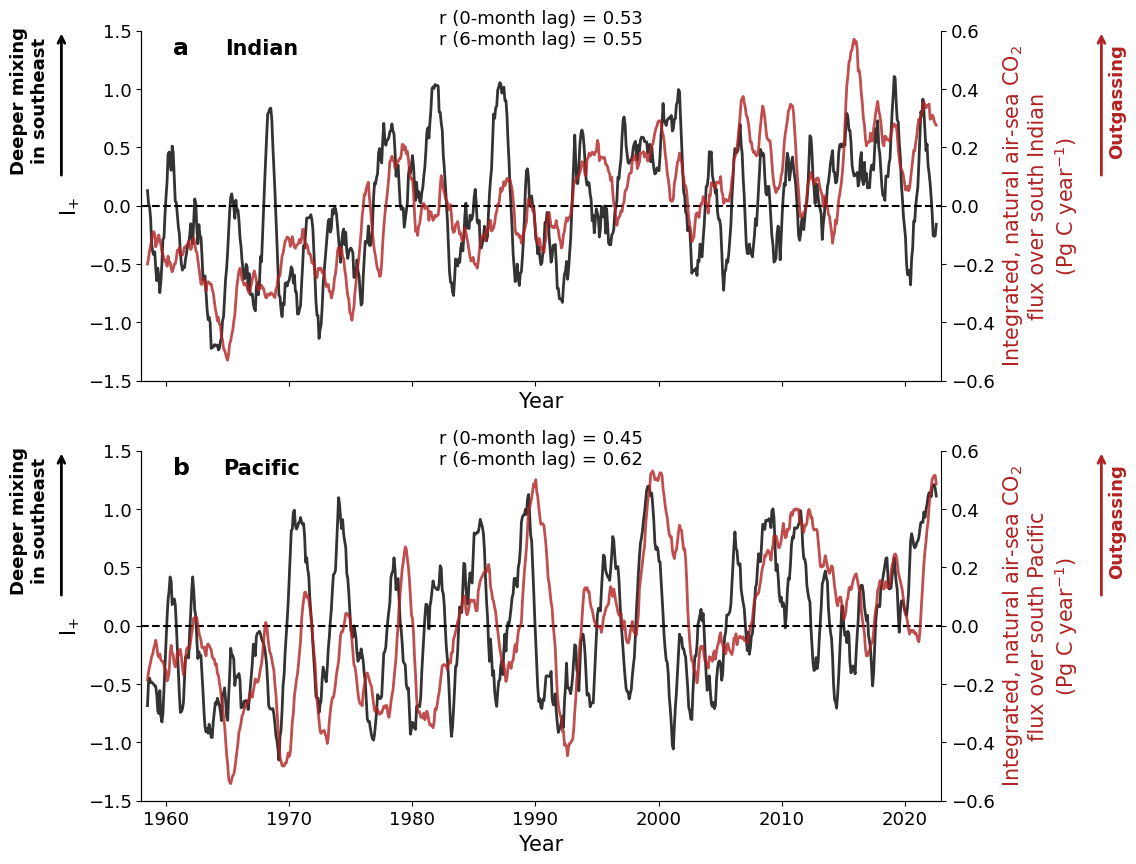

In [159]:

cols = ['k', 'firebrick']
fstic = 13
fslab = 15
wid = 1.0

fig = plt.figure(figsize=(10,10), facecolor='w')
gs = GridSpec(2,1)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])
ax1b = ax1.twinx()
ax2b = ax2.twinx()

ax1.spines[['top','right']].set_visible(False)
ax1b.spines[['top']].set_visible(False)
ax2.spines[['top','right']].set_visible(False)
ax2b.spines[['top']].set_visible(False)

ax1.tick_params(labelsize=fstic, labelbottom=False)
ax1b.tick_params(labelsize=fstic, left=False, labelleft=False, right=True, labelright=True)
ax2.tick_params(labelsize=fstic)
ax2b.tick_params(labelsize=fstic, left=False, labelleft=False, right=True, labelright=True)


time = Iplus_pac_12month.coords['time']

labs = ['I$^{MLD}_{+}$ (Indian)', 'SAM']
ax1.plot(time, Iplus_ind_12month, color=cols[0], linewidth=wid*2, alpha=0.8, label=labs[0])
ax1b.plot(time, -cflx_ind_12month, color=cols[1], linewidth=wid*2, alpha=0.8, label=labs[1])

labs = ['I$^{MLD}_{+}$ (Pacific)', 'SAM']
ax2.plot(time, Iplus_pac_12month, color=cols[0], linewidth=wid*2, alpha=0.8, label=labs[0])
ax2b.plot(time, -cflx_pac_12month, color=cols[1], linewidth=wid*2, alpha=0.8, label=labs[1])

ax1.set_xlabel('Year', fontsize=fslab)
ax2.set_xlabel('Year', fontsize=fslab)
ax1.set_ylabel('I$_{+}$', fontsize=fslab)
ax2.set_ylabel('I$_{+}$', fontsize=fslab)
ax1b.set_ylabel('Integrated, natural air-sea CO$_2$\nflux over south Indian\n(Pg C year$^{-1}$)', fontsize=fslab, color='firebrick')
ax2b.set_ylabel('Integrated, natural air-sea CO$_2$\nflux over south Pacific\n(Pg C year$^{-1}$)', fontsize=fslab, color='firebrick')

xx = 0.5; yy = 0.95
plt.text(xx,yy, 'r (0-month lag) = %.2f\nr (6-month lag) = %.2f'%(-icors[0], -icors[6]), color=cols[0], fontsize=fstic, va='bottom', ha='center', transform=ax1.transAxes)
plt.text(xx,yy, 'r (0-month lag) = %.2f\nr (6-month lag) = %.2f'%(-pcors[0], -pcors[6]), color=cols[0], fontsize=fstic, va='bottom', ha='center', transform=ax2.transAxes)

y1 = -1.5; y2 = 1.5
ax1.set_ylim(y1,y2)
ax2.set_ylim(y1,y2)
y1 = -0.6; y2 = 0.6
ax1b.set_ylim(y1,y2)
ax2b.set_ylim(y1,y2)
ax1.set_xlim(time.min(), time.max())
ax2.set_xlim(time.min(), time.max())
ax1b.set_xlim(time.min(), time.max())
ax2b.set_xlim(time.min(), time.max())

xx = 0.05; yy = 0.95
plt.text(xx,yy,'a', fontweight='bold', fontsize=fslab+2, va='center', ha='center', transform=ax1.transAxes)
plt.text(xx,yy,'b', fontweight='bold', fontsize=fslab+2, va='center', ha='center', transform=ax2.transAxes)
plt.text(xx+0.1,yy,'Indian', fontweight='bold', fontsize=fslab, va='center', ha='center', transform=ax1.transAxes)
plt.text(xx+0.1,yy,'Pacific', fontweight='bold', fontsize=fslab, va='center', ha='center', transform=ax2.transAxes)

ax1.plot(time, np.zeros(len(time)), 'k--')
ax2.plot(time, np.zeros(len(time)), 'k--')

plt.subplots_adjust(left=0.075, right=0.875)


ax1.annotate(
    ' ',               # The text to display
    xy=(-0.1, 1),        # The location to point to
    xytext=(-0.1, 0.55),                # The location of the text
    xycoords='axes fraction',
    arrowprops=dict(facecolor='k', arrowstyle='->', linewidth=2),  # Arrow style
    fontsize=12,                     # Font size
    color='k',                     # Text color
    horizontalalignment='center',      # Text alignment
    verticalalignment='center'
)
ax1.annotate(
    ' ',               # The text to display
    xy=(1.2, 1),        # The location to point to
    xytext=(1.2, 0.55),                # The location of the text
    xycoords='axes fraction',
    arrowprops=dict(edgecolor='firebrick', arrowstyle='->', linewidth=2),  # Arrow style
    fontsize=12,                     # Font size
    color='firebrick',                     # Text color
    horizontalalignment='center',      # Text alignment
    verticalalignment='center'
)
plt.text(-0.14,0.8,'Deeper mixing\nin southeast', fontweight='bold', fontsize=fstic, va='center', ha='center', transform=ax1.transAxes, rotation=90)
plt.text(1.22,0.8,'Outgassing', fontweight='bold', fontsize=fstic, color='firebrick', va='center', ha='center', transform=ax1.transAxes, rotation=90)
ax2.annotate(
    ' ',               # The text to display
    xy=(-0.1, 1),        # The location to point to
    xytext=(-0.1, 0.55),                # The location of the text
    xycoords='axes fraction',
    arrowprops=dict(facecolor='k', arrowstyle='->', linewidth=2),  # Arrow style
    fontsize=12,                     # Font size
    color='k',                     # Text color
    horizontalalignment='center',      # Text alignment
    verticalalignment='center'
)
ax2.annotate(
    ' ',               # The text to display
    xy=(1.2, 1),        # The location to point to
    xytext=(1.2, 0.55),                # The location of the text
    xycoords='axes fraction',
    arrowprops=dict(edgecolor='firebrick', arrowstyle='->', linewidth=2),  # Arrow style
    fontsize=12,                     # Font size
    color='firebrick',                     # Text color
    horizontalalignment='center',      # Text alignment
    verticalalignment='center'
)
plt.text(-0.14,0.8,'Deeper mixing\nin southeast', fontweight='bold', fontsize=fstic, va='center', ha='center', transform=ax2.transAxes, rotation=90)
plt.text(1.22,0.8,'Outgassing', fontweight='bold', fontsize=fstic, color='firebrick', va='center', ha='center', transform=ax2.transAxes, rotation=90)


fig.savefig('/home/pbuchanan/analysis_samw/fig-mld_index_fCO2.png', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-mld_index_fCO2.pdf', dpi=300, bbox_inches='tight')
fig.savefig('/home/pbuchanan/analysis_samw/fig-mld_index_fCO2_trans.png', dpi=300, bbox_inches='tight', transparent=True)
